# **Incertidumbre en los modelos del subsuelo debido al desplazamiento estático**

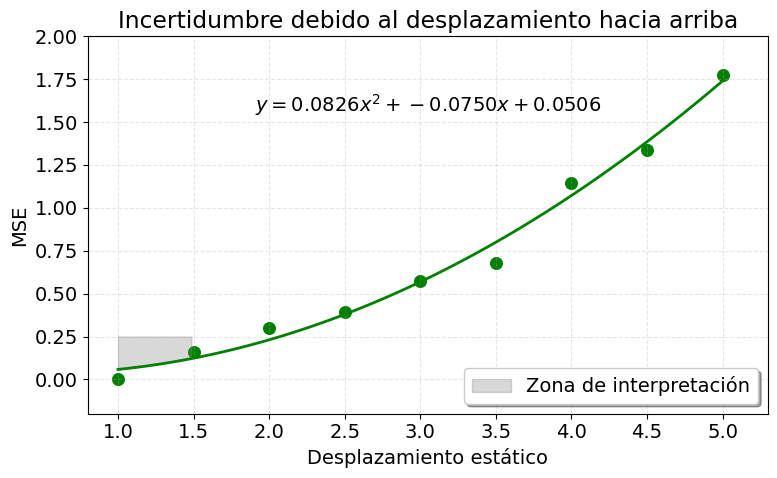

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams.update({"font.size": 14})

# Datos de ejemplo
x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
y_cuad = np.array([0, 0.161457939, 0.298316451, 0.390389485, 0.570826712, 
                   0.677577203, 1.147781201, 1.336915102, 1.776199232])

# --- Regresión Cuadrática ---
coef_cuad = np.polyfit(x, y_cuad, 2)
polinomio_cuad = np.poly1d(coef_cuad)

# Ecuación en formato LaTeX
ecuacion_cuad = (r"$y = {:.4f}x^2 + {:.4f}x + {:.4f}$"
                 .format(coef_cuad[0], coef_cuad[1], coef_cuad[2]))

# --- Crear el Gráfico ---
fig, ax = plt.subplots(figsize=(8, 5))

# Datos
ax.scatter(x, y_cuad, color='green', edgecolors='green', s=70, label='Datos observados')

# Línea de tendencia
x_vals = np.linspace(min(x), max(x), 100)
y_vals = polinomio_cuad(x_vals)
ax.plot(x_vals, y_vals, color='green', linewidth=2, label='Ajuste cuadrático')

# --- Rellenar desde y=0.25 hacia abajo pero solo por encima de la curva y hasta x=1.25 ---
y_fill_limit = 0.25  
mask_fill = (y_vals < y_fill_limit) & (x_vals <= 1.525)  
ax.fill_between(x_vals[mask_fill], y_vals[mask_fill], y_fill_limit, color='gray', alpha=0.3, label="Región de incertidumbre")

# Agregar ecuación en la parte superior del gráfico
ax.text(0.5, 0.80, ecuacion_cuad, transform=ax.transAxes, fontsize=14, 
        color='black', ha='center')

# Agregar manualmente el parche a la leyenda
red_patch = mpatches.Patch(color='gray', alpha=0.3, label='Zona de interpretación')

# Etiquetas y títulos
ax.set_title("Incertidumbre debido al desplazamiento hacia arriba")
ax.set_xlabel("Desplazamiento estático")
ax.set_ylabel("MSE")

# Mejoras visuales
ax.grid(True, which="both", linestyle='--', alpha=0.3)
plt.tight_layout()
plt.ylim([-0.2, 2])
plt.xlim([0.8, 5.3])

# Agregar la leyenda
ax.legend(handles=[red_patch], loc='lower right',frameon=True, shadow=True, fancybox=True)

plt.savefig("incertidumbre+MT.svg", dpi=300, bbox_inches='tight', format='svg')

plt.show()


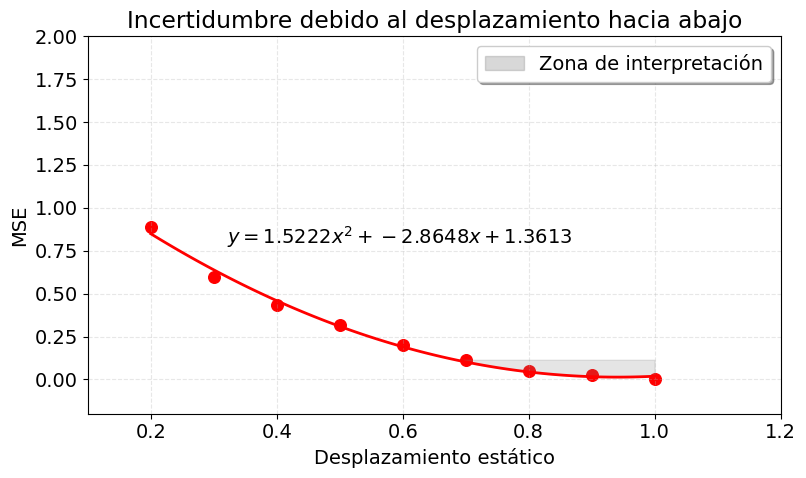

In [82]:
# Datos de ejemplo
x = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
y_cuad = np.array([0.890222445, 0.594991519, 0.432314566, 0.314813719, 0.202510491, 0.114546503, 0.050736657, 0.026855428, 0])

# --- Regresión Cuadrática ---
coef_cuad = np.polyfit(x, y_cuad, 2)
polinomio_cuad = np.poly1d(coef_cuad)

# Ecuación en formato LaTeX
ecuacion_cuad = (r"$y = {:.4f}x^2 + {:.4f}x + {:.4f}$"
                 .format(coef_cuad[0], coef_cuad[1], coef_cuad[2]))

# --- Crear el Gráfico ---
fig, ax = plt.subplots(figsize=(8, 5))

# Datos
ax.scatter(x, y_cuad, color='red', edgecolors='red', s=70, label='Datos observados')

# Línea de tendencia
x_vals = np.linspace(min(x), max(x), 100)
y_vals = polinomio_cuad(x_vals)
ax.plot(x_vals, y_vals, color='red', linewidth=2, label='Ajuste cuadrático')

# Rellenar SOLO donde y_vals < 0.114546503, hasta y=0.114546503
ax.fill_between(
    x_vals, 
    y_vals,                  # Límite inferior (la curva)
    0.114546503,             # Límite superior (y=0.114546503)
    where=(y_vals < 0.114546503),  # ¡Clave! Solo donde la curva < 0.114546503
    color='gray', 
    alpha=0.2,
    interpolate=True
)

# Agregar ecuación en la parte superior del gráfico
ax.text(0.45, 0.45, ecuacion_cuad, transform=ax.transAxes, fontsize=14, 
        color='black', ha='center')

# Agregar manualmente el parche a la leyenda
red_patch = mpatches.Patch(color='gray', alpha=0.3, label='Zona de interpretación')

# Etiquetas y títulos
ax.set_title("Incertidumbre debido al desplazamiento hacia abajo")
ax.set_xlabel("Desplazamiento estático")
ax.set_ylabel("MSE")

# Mejoras visuales
ax.grid(True, which="both", linestyle='--', alpha=0.3)
plt.tight_layout()
#ax.spines[['top', 'right']].set_visible(False)
plt.ylim([-0.2,2])
plt.xlim([0.1,1.2])
ax.legend(handles=[red_patch], loc='upper right',frameon=True, shadow=True, fancybox=True)
plt.savefig("incertidumbre-MT.svg", dpi=300, bbox_inches='tight', format='svg')

# Mostrar
plt.show()

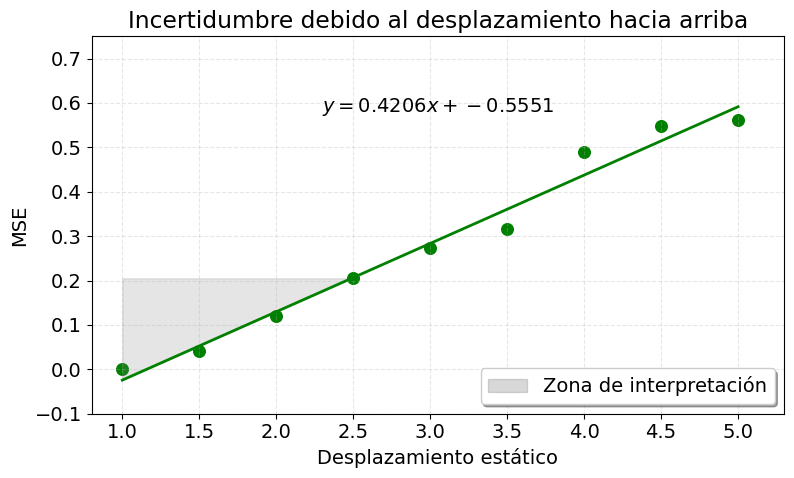

In [89]:
# Datos de ejemplo
x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
y_cuad = np.array([0, 0.041210495, 0.119030713, 0.204955955, 0.272589683, 0.315921557, 0.488477601, 0.547801215, 0.561980295])


# --- Regresión Cuadrática ---
coef_cuad = np.polyfit(x, y_cuad, 1)
polinomio_cuad = np.poly1d(coef_cuad)

# Ecuación en formato LaTeX (ahora es de la forma y = mx + b)
ecuacion_lineal = r"$y = {:.4f}x + {:.4f}$".format(coef_lineal[0], coef_lineal[1])

# --- Crear el Gráfico ---
fig, ax = plt.subplots(figsize=(8, 5))

# Datos
ax.scatter(x, y_cuad, color='green', edgecolors='green', s=70, label='Datos observados')

# Línea de tendencia
x_vals = np.linspace(min(x), max(x), 100)
y_vals = polinomio_cuad(x_vals)
ax.plot(x_vals, y_vals, color='green', linewidth=2, label='Ajuste cuadrático')

# Rellenar SOLO donde y_vals < 0.114546503, hasta y=0.114546503
ax.fill_between(
    x_vals, 
    y_vals,                  # Límite inferior (la curva)
    0.204955955,             # Límite superior (y=0.114546503)
    where=(y_vals < 0.204955955),  # ¡Clave! Solo donde la curva < 0.114546503
    color='gray', 
    alpha=0.2,
    interpolate=True
)

# Agregar ecuación (ahora la lineal)
ax.text(0.5, 0.80, ecuacion_lineal, transform=ax.transAxes, fontsize=14, 
        color='black', ha='center')

# Agregar manualmente el parche a la leyenda
red_patch = mpatches.Patch(color='gray', alpha=0.3, label='Zona de interpretación')

# Etiquetas y títulos
ax.set_title("Incertidumbre debido al desplazamiento hacia arriba")
ax.set_xlabel("Desplazamiento estático")
ax.set_ylabel("MSE")

# Mejoras visuales
ax.grid(True, which="both", linestyle='--', alpha=0.3)
plt.tight_layout()
#ax.spines[['top', 'right']].set_visible(False)
plt.ylim([-0.1,0.75])
plt.xlim([0.8, 5.3])
ax.legend(handles=[red_patch], loc='lower right',frameon=True, shadow=True, fancybox=True)
plt.savefig("incertidumbre+SEV.svg", dpi=300, bbox_inches='tight', format='svg')

# Mostrar
plt.show()

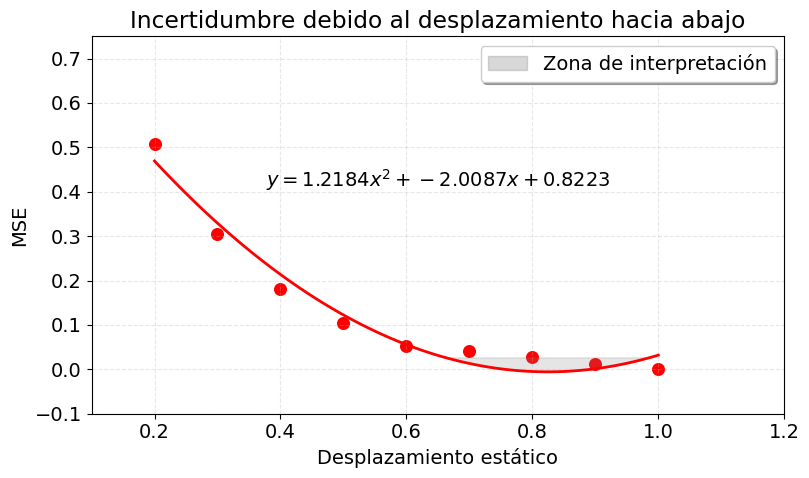

In [103]:
# Datos de ejemplo
x = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
y_cuad = np.array([0.508136913, 0.304718915, 0.180889371, 0.104377443, 0.053597932, 0.040304438, 0.026903432, 0.013057227, 0])



# --- Regresión Cuadrática ---
coef_cuad = np.polyfit(x, y_cuad, 2)
polinomio_cuad = np.poly1d(coef_cuad)

# Ecuación en formato LaTeX
ecuacion_cuad = (r"$y = {:.4f}x^2 + {:.4f}x + {:.4f}$"
                 .format(coef_cuad[0], coef_cuad[1], coef_cuad[2]))

# --- Crear el Gráfico ---
fig, ax = plt.subplots(figsize=(8, 5))

# Datos
ax.scatter(x, y_cuad, color='red', edgecolors='red', s=70, label='Datos observados')

# Línea de tendencia
x_vals = np.linspace(min(x), max(x), 100)
y_vals = polinomio_cuad(x_vals)
ax.plot(x_vals, y_vals, color='red', linewidth=2, label='Ajuste cuadrático')

# Rellenar SOLO donde y_vals < 0.114546503, hasta y=0.114546503
ax.fill_between(
    x_vals, 
    y_vals,                  # Límite inferior (la curva)
    0.026903432,             # Límite superior (y=0.114546503)
    where=(y_vals < 0.026903432),  # ¡Clave! Solo donde la curva < 0.114546503
    color='gray', 
    alpha=0.2,
    interpolate=True
)

# Agregar ecuación en la parte superior del gráfico
ax.text(0.5, 0.60, ecuacion_cuad, transform=ax.transAxes, fontsize=14, 
        color='black', ha='center')

# Agregar manualmente el parche a la leyenda
red_patch = mpatches.Patch(color='gray', alpha=0.3, label='Zona de interpretación')

# Etiquetas y títulos
ax.set_title("Incertidumbre debido al desplazamiento hacia abajo")
ax.set_xlabel("Desplazamiento estático")
ax.set_ylabel("MSE")

# Mejoras visuales
ax.grid(True, which="both", linestyle='--', alpha=0.3)
plt.tight_layout()
#ax.spines[['top', 'right']].set_visible(False)
plt.ylim([-0.1,0.75])
plt.xlim([0.1,1.2])
ax.legend(handles=[red_patch], loc='upper right',frameon=True, shadow=True, fancybox=True)
plt.savefig("incertidumbre-SEV.svg", dpi=300, bbox_inches='tight', format='svg')

# Mostrar
plt.show()